# Aggregate results from Syn-Test for the simulated regression example

In [1]:
TDDPM_DIR = "/home/liu00980/Documents/syn/tab-ddpm"

import numpy as np

import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

from sample import TrueSampler


import sys

sys.path.insert(0, os.path.join(TDDPM_DIR, "utils"))

from utils_syn import soft_type_i_errors

In [15]:
alpha = 0.05
epsilon = 0.01
result_dict_save_path = "./results/result_dict_num_7.pkl"
raw_result_dict_save_path = "./results/raw_result_dict_num_7.pkl"

In [16]:
result_dict = pickle.load(open(result_dict_save_path, "rb"))
rho_list, type_i_error_list, p_values_combined = soft_type_i_errors(
    result_dict, alpha=alpha, epsilon=epsilon
)

raw_result_dict = pickle.load(open(raw_result_dict_save_path, "rb"))
_, raw_type_i_error_list, raw_p_values_combined = soft_type_i_errors(
    raw_result_dict, alpha=alpha, epsilon=0
)

Text(0.5, 1.0, 'Syn-Test on null feature $X_8$: Type-I error curve')

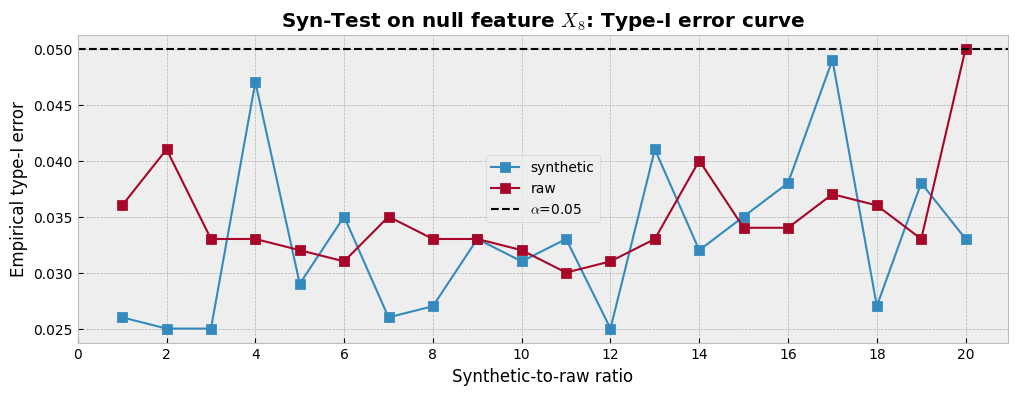

In [17]:
# Visualize Syn-Test tuning curve

plt.style.use("bmh")

plt.figure(figsize=(12, 4))

plt_kwargs = {
    "marker": "s",
    "mew": 2,
    "linestyle": "-",
    "markersize": 6,
    "linewidth": 1.5,
}

plt.plot(rho_list, type_i_error_list, label="synthetic", **plt_kwargs)
plt.plot(rho_list, raw_type_i_error_list, label="raw", **plt_kwargs)

plt.axhline(
    alpha,
    linestyle="--",
    color="black",
    linewidth=plt_kwargs["linewidth"],
    label=fr"$\alpha$={alpha}",
)

plt.legend()

plt.xticks(ticks=np.arange(0, 21, 2))
plt.xlabel("Synthetic-to-raw ratio")


plt.ylabel("Empirical type-I error")

plt.title(r"Syn-Test on null feature $X_8$: Type-I error curve", fontweight="bold")

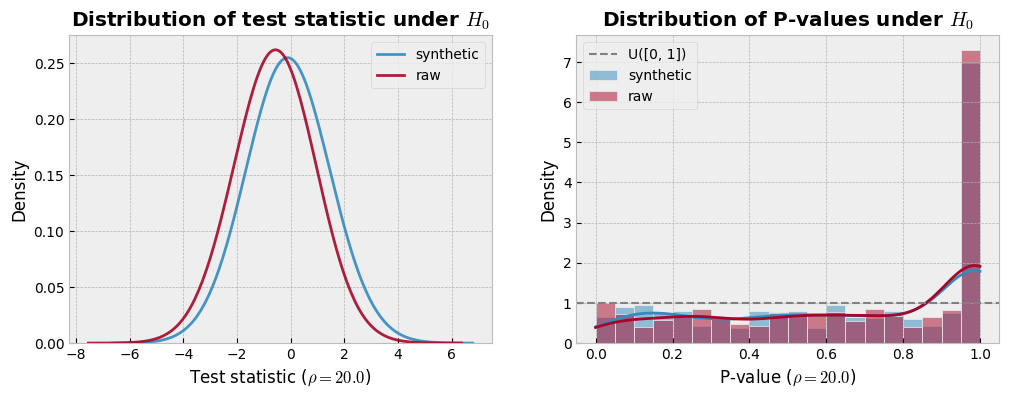

In [18]:
# Estimated null distribution and p-values from Syn-Test

rho_best = 20.0
plt_kwargs = {
    "sb1": {
        "fill": False,
        "alpha": 0.9,
        "common_grid": True,
        "linewidth": 2,
        "bw_adjust": 5,
    },
    "sb2": {
        "stat": "density",
        "bins": 20,
        "kde": True,
        "alpha": 0.5,
        "common_bins": True,
    },
}

p_values_combined_adjust = np.array(
    [
        p + epsilon
        if p >= alpha - epsilon and p <= alpha
        else p
        for p in p_values_combined
    ]
)


fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs = axs.ravel()

# Syn-Test tuning curve with reference
sns.kdeplot(
    result_dict[str(rho_best)]["twin_2"]["test_stat_null"],
    label="synthetic",
    ax=axs[0],
    **plt_kwargs["sb1"],
)
sns.kdeplot(
    raw_result_dict[str(rho_best)]["twin_2"]["test_stat_null"],
    label="raw",
    ax=axs[0],
    **plt_kwargs["sb1"],
)

axs[0].set_xlabel(rf"Test statistic ($\rho={rho_best}$)")
axs[0].set_title(
    rf"Distribution of test statistic under $H_0$", weight="bold"
)
axs[0].legend()

# Estimated distribution of test stat and distribution of p-value, with reference
sns.histplot(
    p_values_combined_adjust, label="synthetic", ax=axs[1], **plt_kwargs["sb2"]
)
sns.histplot(raw_p_values_combined, label="raw", ax=axs[1], **plt_kwargs["sb2"])
axs[1].axhline(y=1, linestyle="--", color="grey", linewidth=1.5, label="U([0, 1])")
axs[1].set_xlabel(rf"P-value ($\rho={rho_best}$)")
axs[1].set_title(rf"Distribution of P-values under $H_0$", weight="bold")
axs[1].legend()


plt.show()